# Tarea 3


EL7024 - Teoría de Información: Fundamentos y Aplicaciones

Profesor: Jorge Silva
Auxiliar: Sebastián Espinosa

Autor: Martín Cornejo

## Paquetes necesarios

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pdb

## Algoritmo Blahut-Arimoto

In [16]:
def blahut_arimoto(probC, matrizTransicion):
    Iu=1
    Il=0
    error = 0.00001
    N, M = matrizTransicion.shape
    qy = np.matmul(matrizTransicion, probC)
    F = np.zeros(M)
    while True:
        for idx in range(M):
            temp = 0
            for idy in range(N):
                temp += matrizTransicion[idy, idx]*np.log(matrizTransicion[idy, idx] / qy[idy] + 0.000001)[0]
            
            F[idx] = np.exp(temp)
        
        x = np.matmul(F, probC)[0]
        Il = np.log2(x)
        Iu = np.log2(np.amax(F))
        
        if (Iu - Il) < error:
            channel_cap = Il
            #print("prob r(x)")
            #print(probC)
            return channel_cap            
        else:
            probC = np.multiply(np.reshape(np.multiply(F, 1/x), (2,1)), probC)
            qy = np.matmul(matrizTransicion, probC)

## P1 b)

In [17]:
capacities = []

alphas = np.linspace(0.0001, 0.9999, 100)
for alpha in alphas:
    matrizT = np.transpose(np.array([(1-alpha, alpha/2, alpha/2),(alpha/2, alpha/2, 1 - alpha)]))
    N, M = matrizT.shape
    probC = np.ones((M, 1))
    probC[0,0] = 1/3
    probC[1,0] = 2/3
    capacities.append(blahut_arimoto(probC, matrizT))

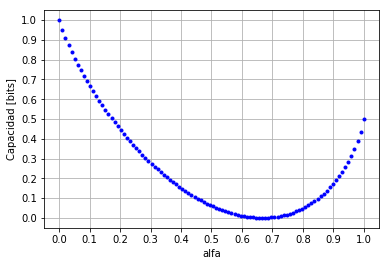

In [18]:
plt.grid()
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.plot(alphas,capacities, 'b.')
plt.xlabel("alfa")
plt.ylabel("Capacidad [bits]")
plt.savefig("capacidad_alfa.pdf")

## P2 c)

In [69]:
capacities = []

nCascadas = np.linspace(1, 10, 10)
pBSC = 0.2
pBar = lambda n : 1/2*(1 - np.power((1 - 2*pBSC), n))

for nCascada in nCascadas:
    matrizT = np.transpose(np.array([(1-pBar(nCascada), pBar(nCascada)),(pBar(nCascada), 1 - pBar(nCascada))]))
    N, M = matrizT.shape
    probC = np.ones((M, 1))
    probC[0,0] = 1/2
    probC[1,0] = 1/2
    capacities.append(blahut_arimoto(probC, matrizT))

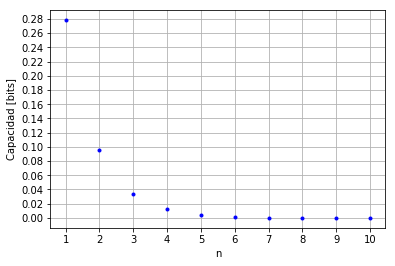

In [70]:
plt.grid()
plt.yticks(np.arange(0, 0.3, step=0.02))
plt.xticks(np.arange(0, 11, step=1))
plt.plot(nCascadas,capacities, 'b.')
plt.xlabel("n")
plt.ylabel("Capacidad [bits]")
plt.savefig("capacidad_cascada.pdf")